# Subbreddit Classification

## Part 1: Data Collection

In [1]:
import requests
import pandas as pd

In [2]:
#url of the selected reddit
url = 'https://api.pushshift.io/reddit/search/submission'

In [3]:
#create a function to collect the data

def dataCollection(url,subreddit,size,n):

    #extract the first set of data
    
    #set the parameters
    params = {
        'subreddit' : subreddit,
        'size' : size,
    }

    #send request to grab the data
    res = requests.get(url,params)
    #check the status code
    print(res.status_code)
    #store the data
    data = res.json()

    #extract only the posts and convert to dataframe
    posts=pd.DataFrame(data['data'])
    n_posts=posts.shape[0]  
    
    #extract the utc for the next data collection
    minUtc=posts['created_utc'].min()
    
    #keep collecting the data until number of record reach n 
    while n_posts<n:
        params = {
            'subreddit' : subreddit,
            'size' : size,
            'before': minUtc
        }

        #send request to grab the data
        res = requests.get(url,params)
        #check the status code
        print(res.status_code)
        #store the data
        data = res.json()

        #extract only the posts and convert to dataframe
        posts=posts.append(pd.DataFrame(data['data']))
        n_posts=posts.shape[0]
        #extract the min utc for the next data collection
        minUtc=posts['created_utc'].min()
        
    #reset the index
    posts=posts.reset_index()
    #drop unnecessarry columns
    dropCol_list=posts.columns.difference(['subreddit','selftext','title'])    
    posts.drop(dropCol_list, axis=1, inplace=True)
    
    return posts


In [4]:
boardgame=dataCollection(url,'boardgame',100,900)

200
200
200
200
200
200
200
200
200


In [5]:
boardgame.shape

(900, 3)

In [6]:
#check the data type
boardgame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   selftext   900 non-null    object
 1   subreddit  900 non-null    object
 2   title      900 non-null    object
dtypes: object(3)
memory usage: 21.2+ KB


In [7]:
boardgame.head()

,selftext,subreddit,title
0,,boardgame,What Insert do you prefer? I'm a fan of folded...
1,,boardgame,[Top 5] Best Zombie Board Games That Are Fun
2,,boardgame,Space Lion - Live on Gamefound now! 2-4 Player...
3,,boardgame,My aunt used to have a board game that looked ...
4,,boardgame,"I'm in so happy about this game! It's just so,..."


In [8]:
videogame=dataCollection(url,'videogame',100,900)

200
200
200
200
200
200
200
200
200


In [9]:
videogame.shape

(900, 3)

In [10]:
#check the data type
videogame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   selftext   900 non-null    object
 1   subreddit  900 non-null    object
 2   title      900 non-null    object
dtypes: object(3)
memory usage: 21.2+ KB


In [11]:
videogame.head(5)

,selftext,subreddit,title
0,,VideoGame,i got play of the game- cod ww2 plz sub
1,,VideoGame,Thief of Thieves but I make everyone mad
2,,VideoGame,some GOOD sniping ACCURACY..also if you guys c...
3,,VideoGame,The Best Upcoming Horror Games 2019
4,,VideoGame,I Pretty Much OWNED this LOBBY -COD WW2


In [12]:
#combine the two dataFrame
df1= boardgame
df2= videogame
data=pd.concat([df1,df2])

In [13]:
#check head
data.head(5)

,selftext,subreddit,title
0,,boardgame,What Insert do you prefer? I'm a fan of folded...
1,,boardgame,[Top 5] Best Zombie Board Games That Are Fun
2,,boardgame,Space Lion - Live on Gamefound now! 2-4 Player...
3,,boardgame,My aunt used to have a board game that looked ...
4,,boardgame,"I'm in so happy about this game! It's just so,..."


In [14]:
data[100:105]

,selftext,subreddit,title
100,So a friend described this game to me recently...,boardgame,Does anybody know this game???
101,,boardgame,Play games with kids
102,,boardgame,Oceans
103,,boardgame,"Fast and fun card game! Easy to learn, fast se..."
104,,boardgame,What are your favourite GAME BOARDS of all time?


In [15]:
data.tail(5)

,selftext,subreddit,title
895,,VideoGame,Dynasty Warriors 5 XL - Aura Body With Musou T...
896,,VideoGame,My Destiny LFG: Destiny Forum for LFG-LFM Players
897,,VideoGame,PrototypeKaito Plays:Front Mission 3-MFA Database
898,,VideoGame,Choices Rules of Engagement: Newlyweds Chapter 2
899,,VideoGame,Video Gamers Beware: Microtransactions Lurk Ev...


In [16]:
data.shape

(1800, 3)

In [17]:
#convert "subreddit" column to binary labels

data['subreddit'] =data['subreddit'].map({'boardgame':0, 'VideoGame':1})

In [18]:
data.head(5)

,selftext,subreddit,title
0,,0,What Insert do you prefer? I'm a fan of folded...
1,,0,[Top 5] Best Zombie Board Games That Are Fun
2,,0,Space Lion - Live on Gamefound now! 2-4 Player...
3,,0,My aunt used to have a board game that looked ...
4,,0,"I'm in so happy about this game! It's just so,..."


In [19]:
data.isnull().sum()

selftext     0
subreddit    0
title        0
dtype: int64

In [20]:
data['subreddit'].value_counts()

1    900
0    900
Name: subreddit, dtype: int64

In [21]:
X = data['title']+data['selftext']
y = data['subreddit']

In [22]:
X.shape

(1800,)

In [23]:
X[100:105]

100    Does anybody know this game???So a friend desc...
101                                 Play games with kids
102                                               Oceans
103    Fast and fun card game! Easy to learn, fast se...
104     What are your favourite GAME BOARDS of all time?
dtype: object

In [24]:
y.shape

(1800,)

## Part 2: Natural Language Processing

Converting standard text data (like Titles and Comments) into a format that allows us to analyze it and use it in modeling.

### Pre-processing

- Convert to lower case
- Remove special characters
- Tokenizing
- Lemmatizing/Stemming
- Stop word removal

In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [27]:
y_test.value_counts(normalize = True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

## CountVectorizer+MultinomialNB

In [29]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe_cv_nb = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [30]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and 2-grams).

pipe_params_cv_nb = {
    'cvec__max_features' : [2000,3000,4000,5000],
    'cvec__min_df' : [2,3],
    'cvec__max_df' : [.9,.95],
    'cvec__ngram_range' : [(1,1), (1,2)]
}

In [32]:
# Instantiate GridSearchCV.

gs_cv_nb = GridSearchCV(pipe_cv_nb, # what object are we optimizing?
                  param_grid = pipe_params_cv_nb, # what parameters values are we searching?
                  cv = 5) # 5-fold cross-validation.

In [33]:
# Fit GridSearch to training data.
gs_cv_nb.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [35]:
gs_cv_nb.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1)}

In [36]:
print(gs_cv_nb.best_score_)

0.8319444444444445


In [38]:
# Score model on training set.
gs_cv_nb.score(X_train,y_train)

0.9048611111111111

In [39]:
# Score model on testing set.
gs_cv_nb.score(X_test,y_test)

0.8805555555555555

In [44]:
# Get predictions
preds = gs_cv_nb.predict(X_test)
# Save confusion matrix values
tn_cv_nb, fp_cv_nb, fn_cv_nb, tp_cv_nb = confusion_matrix(y_test, preds).ravel()

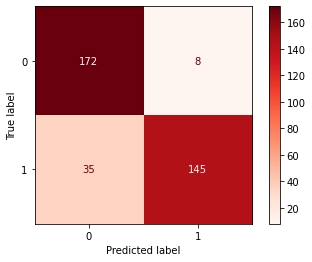

In [45]:
# View confusion matrix
plot_confusion_matrix(gs_cv_nb, X_test, y_test, cmap='Reds', values_format='d');

In [46]:
print("True Negatives :", tn_cv_nb)
print("True Positives :", tp_cv_nb)
print("false Negatives :", fn_cv_nb)
print("false Positives :", fp_cv_nb)

True Negatives : 172
True Positives : 145
false Negatives : 35
false Positives : 8


In [47]:
# Calculate the specificity

spec = tn_cv_nb / (tn_cv_nb + fp_cv_nb)

In [48]:
print("specificity =",round(spec,2))

specificity = 0.96


## TfidfVectorizer+MultinomialNB

In [85]:
# Let's set a pipeline up with two stages:
# 1. tf-idf vectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe_tvec_nb = Pipeline ([
    
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])


In [86]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# No stop words and english stop words
# Check (individual tokens) and also check (individual tokens and 2-grams).
pipe_tvec_params = {
    
    'tvec__max_features': [2000,3000,4000,5000],
    'tvec__stop_words': [None,'english'],
    'tvec__ngram_range': [(1,1),(1,2)],    
    'tvec__min_df' : [2,3],
    'tvec__max_df' : [.9,.95]
    
}

In [87]:
# Instantiate GridSearchCV.

gs_tvec_nb = GridSearchCV (
                        pipe_tvec_nb,
                        param_grid = pipe_tvec_params,
                        cv = 5
)

In [88]:
# Fit GridSearch to training data.
gs_tvec_nb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [89]:
gs_tvec_nb.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 4000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [90]:
# Score model on training set.
gs_tvec_nb.score(X_train, y_train)

0.9416666666666667

In [91]:
# Score model on testing set.
gs_tvec_nb.score(X_test, y_test)

0.875

In [92]:
# Get predictions
preds_tvec = gs_tvec_nb.predict(X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec).ravel()

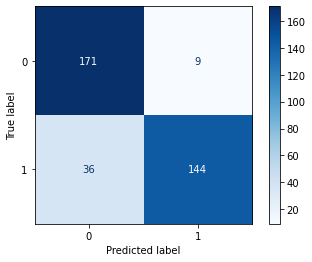

In [93]:
plot_confusion_matrix(gs_tvec_nb,X_test,y_test,cmap='Blues',values_format='d')

In [94]:
# Calculate the specificity
spec = tn / (tn + fp)

In [95]:
print('specificity =',round(spec,2))

specificity = 0.95


## CountVectorizer+RandomForest (Done)

In [101]:
from  sklearn.ensemble import RandomForestClassifier 

In [102]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. RandomForest (estimator)

pipe_cv_rg = Pipeline ([
    
    ('cvec', CountVectorizer()),
    ('rg', RandomForestClassifier())
])


In [120]:
pipe_rg_params = {
    'cvec__max_features' : [2000,3000,4000,5000],
    'cvec__min_df' : [2,3],
    'cvec__max_df' : [.9,.95],
    'cvec__ngram_range' : [(1,1), (1,2)],
    #'rg__n_estimators': [100,150,200],
    #'rg__max_depth': [None,1,2,3,4,5]
}

In [121]:
gs_cv_rg = GridSearchCV(pipe_cv_rg, param_grid = pipe_rg_params, cv = 5)

In [122]:
gs_cv_rg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rg', RandomForestClassifier())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [123]:
pipe_cv_rg.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('rg', RandomForestClassifier())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'rg': RandomForestClassifier(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'rg__bootstrap': True,
 'rg__ccp_alpha': 0.0,
 'rg__class_weight': None,
 'rg__criterion': 'gini',
 'rg__max_depth': None,
 'rg__max_features': 'auto',
 'rg__max_leaf_nodes': None,
 'rg__max_samples': None,
 'rg__min_impurity_decrease': 0.0,
 'rg__min_impurity_split': None,
 'rg__min_samples_leaf': 1,
 'rg__min_samples_split': 2,
 'rg__min_weight

In [124]:
gs_cv_rg.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 4000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [125]:
# Score model on training set.
gs_cv_rg.score(X_train, y_train)

0.9916666666666667

In [126]:
# Score model on testing set.
gs_cv_rg.score(X_test, y_test)

0.8972222222222223

In [127]:
# Get predictions
preds_cv_rg = gs_cv_rg.predict(X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_cv_rg).ravel()

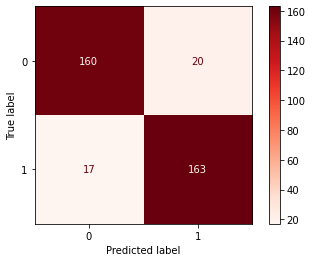

In [128]:
plot_confusion_matrix(gs_cv_rg,X_test,y_test,cmap='Reds',values_format='d')

In [129]:
print("True Negatives :", tn)
print("True Positives :", tp)
print("false Negatives :", fn)
print("false Positives :", fp)

True Negatives : 160
True Positives : 163
false Negatives : 17
false Positives : 20


In [130]:
# Calculate the specificity
spec = tn / (tn + fp)

In [131]:
print('specificity =',round(spec,2))

specificity = 0.89


In [133]:
#calculate the accuracy
accur = (tn+tp)/(tn+tp+fp+fn)

In [134]:
print('accuracy =',round(accur,2))

accuracy = 0.9


## TfidfVectorizerr+RandomForest (Done)

In [135]:
# Let's set a pipeline up with two stages:
# 1. tf-idf vectorizer (transformer)
# 2. Random Forest (estimator)

pipe_tvec_rg = Pipeline ([
    
    ('tvec', TfidfVectorizer()),
    ('rg', RandomForestClassifier())
])


In [136]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# No stop words and english stop words
# Check (individual tokens) and also check (individual tokens and 2-grams).
pipe_tvec_rg_params = {
    
    'tvec__max_features': [2000,3000,4000,5000],
    'tvec__stop_words': [None,'english'],
    'tvec__ngram_range': [(1,1),(1,2)],    
    'tvec__min_df' : [2,3],
    'tvec__max_df' : [.9,.95],
    #'rg__n_estimators': [100,150,200],
    #'rg__max_depth': [None,1,2,3,4,5]
    
}

In [137]:
# Instantiate GridSearchCV.

gs_tvec_rg = GridSearchCV (
                        pipe_tvec_rg,
                        param_grid = pipe_tvec_rg_params,
                        cv = 5
)

In [138]:
gs_tvec_rg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rg', RandomForestClassifier())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [139]:
gs_tvec_rg.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 3000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

In [140]:
# Score model on training set.
gs_tvec_rg.score(X_train, y_train)

0.9902777777777778

In [141]:
# Score model on training set.
gs_tvec_rg.score(X_train, y_train)

0.9902777777777778

In [142]:
# Get predictions
preds_tvec_rg = gs_tvec_rg.predict(X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec_rg).ravel()

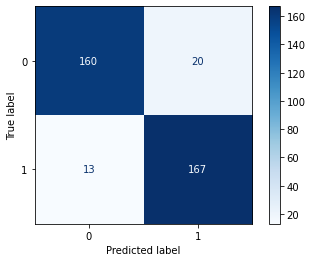

In [143]:
plot_confusion_matrix(gs_tvec_rg,X_test,y_test,cmap='Blues',values_format='d')

In [144]:
print("True Negatives :", tn)
print("True Positives :", tp)
print("false Negatives :", fn)
print("false Positives :", fp)

True Negatives : 160
True Positives : 167
false Negatives : 13
false Positives : 20


In [145]:
# Calculate the specificity
spec = tn / (tn + fp)

In [146]:
print('specificity =',round(spec,2))

specificity = 0.89


In [148]:
#calculate the accuracy
accur = (tn+tp)/(tn+tp+fp+fn)

In [147]:
print('accuracy =',round(accur,2))

accuracy = 0.9


## CountVectorizer+Logistic (Done)

In [150]:
from sklearn.linear_model import LogisticRegression

In [152]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Logistic Regression (estimator)

pipe_cv_lg = Pipeline ([
    
    ('cvec', CountVectorizer()),
    ('lg', LogisticRegression())
])

In [153]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and 2-grams).

pipe_params_cv_lg = {
    'cvec__max_features' : [2000,3000,4000,5000],
    'cvec__min_df' : [2,3],
    'cvec__max_df' : [.9,.95],
    'cvec__ngram_range' : [(1,1), (1,2)]
}

In [154]:
# Instantiate GridSearchCV.

gs_cv_lg = GridSearchCV(pipe_cv_lg, # what object are we optimizing?
                  param_grid = pipe_params_cv_lg, # what parameters values are we searching?
                  cv = 5) # 5-fold cross-validation.

In [155]:
# Fit GridSearch to training data.
gs_cv_lg.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lg', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [158]:
gs_cv_lg.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1)}

In [159]:
# Score model on training set.
gs_cv_lg.score(X_train,y_train)

0.9701388888888889

In [160]:
# Score model on testing set.
gs_cv_lg.score(X_test,y_test)

0.9055555555555556

In [162]:
# Get predictions
preds_cv_lg = gs_cv_lg.predict(X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_cv_lg).ravel()

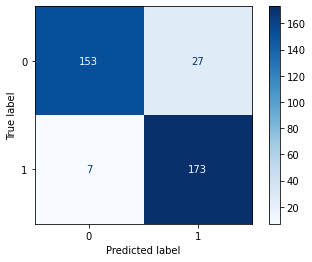

In [163]:
plot_confusion_matrix(gs_cv_lg,X_test,y_test,cmap='Blues',values_format='d')

In [164]:
#calculate the accuracy
accur = (tn+tp)/(tn+tp+fp+fn)

In [165]:
print('accuracy =',round(accur,2))

accuracy = 0.91


In [166]:
# Calculate the specificity
spec = tn / (tn + fp)

In [167]:
print('specificity =',round(spec,2))

specificity = 0.85


## TfidfVectorizer+Logistic

In [173]:
# Let's set a pipeline up with two stages:
# 1. tf-idf vectorizer (transformer)
# 2. Random Forest (estimator)

pipe_tvec_lg = Pipeline ([
    
    ('tvec', TfidfVectorizer()),
    ('lg', LogisticRegression())
])


In [169]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# No stop words and english stop words
# Check (individual tokens) and also check (individual tokens and 2-grams).
pipe_tvec_lg_params = {
    
    'tvec__max_features': [2000,3000,4000,5000],
    'tvec__stop_words': [None,'english'],
    'tvec__ngram_range': [(1,1),(1,2)],    
    'tvec__min_df' : [2,3],
    'tvec__max_df' : [.9,.95],

    
}

In [174]:
# Instantiate GridSearchCV.

gs_tvec_lg = GridSearchCV(pipe_tvec_lg, # what object are we optimizing?
                  param_grid = pipe_tvec_lg_params, # what parameters values are we searching?
                  cv = 5) # 5-fold cross-validation.

In [175]:
# Fit GridSearch to training data.
gs_tvec_lg.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('lg', LogisticRegression())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [180]:
gs_tvec_lg.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 4000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [181]:
# Score model on training set.
gs_tvec_lg.score(X_train,y_train)

0.9527777777777777

In [182]:
# Score model on training set.
gs_tvec_lg.score(X_test,y_test)

0.9055555555555556

In [183]:
# Get predictions
preds_tvec_lg = gs_tvec_lg.predict(X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec_lg).ravel()

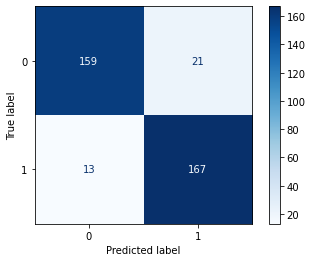

In [184]:
plot_confusion_matrix(gs_tvec_lg,X_test,y_test,cmap='Blues',values_format='d')

In [185]:
#calculate the accuracy
accur = (tn+tp)/(tn+tp+fp+fn)

In [186]:
print('accuracy =',round(accur,2))

accuracy = 0.91


In [187]:
# Calculate the specificity
spec = tn / (tn + fp)

In [188]:
print('specificity =',round(spec,2))

specificity = 0.88
